In [15]:
import requests
import zipfile
from io import BytesIO

uri = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip'

# Download file to memory; caution to fit in memory
download_file = lambda uri: BytesIO(requests.get(uri).content)

# Download it and pin it in memory
zip_data = download_file(uri)

# Pointer to a file in the zip file
file_in_zip = lambda filepath: zipfile.ZipFile(zip_data).open('UCI HAR Dataset/' + filepath)

In [26]:
# We will call our "activity" y_ label
y_label ='activity'

# Parse out all the files and compile them together
def get_training_set() :
    # Read the X column names
    har_data_labels = pd.read_csv(file_in_zip('features.txt'), sep="Is+", names=['id', 'feature_name'])
    
    # Read the activity names
    activity_map = { str(row.id): row. label_name for i, row in pd.read_csv(file_in_zip('activity_labels.txt'), sep="\s+", names=['id', 'label_name']).iterrows() }
                                                        
    # Read the X
    har_data_x = pd.read_csv(file_in_zip('train/X_train.txt'), sep="\s+", names=har_data_labels.feature_name.tolist())

    # Read the Y
    har_data_y = pd.read_csv(file_in_zip('train/y_train.txt'), sep="\s+", names= [y_label])

    # Map the label into a readable form
    har_data_y[y_label] = har_data_y[y_label].apply(lambda x: activity_map[str(x)])

    # Training data, merge X and Y
    har_data_train = pd.concat([har_data_y, har_data_x], axis=1)

    # Read the X test
    har_test_x = pd.read_csv(file_in_zip('test/X_test.txt'), sep="\s+", names=har_data_labels.feature_name.tolist())

    # Read the Y test
    har_test_y = pd.read_csv(file_in_zip('test/y_test.txt'), sep="\s+", names=['activity'])

    # Map the label into a readable form
    har_test_y[y_label] = har_test_y[y_label].apply(lambda x: activity_map[str(x)])

    # Test data, merge X and Y
    har_data_test = pd.concat([har_test_y, har_test_x], axis=1)
    
    # Return the two frames as tuple
    return (har_data_train, har_data_test, sorted(activity_map.items()))

(train_data, test_data, activity_map) = get_training_set()

# Display a preview of the training data
display(train_data.head())

# Display a preview of the test data
display(test_data.head())

/var/folders/cr/nhx4f9sn2j1802mttlxq0q800000gn/T/ipykernel_6442/3484294100.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  har_data_labels = pd.read_csv(file_in_zip('features.txt'), sep="Is+", names=['id', 'feature_name'])


,activity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,STANDING,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,STANDING,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,STANDING,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,STANDING,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,STANDING,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


,activity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,STANDING,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,STANDING,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,STANDING,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,STANDING,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,STANDING,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


# Dimensionality

In [28]:
# Create handy functions to slice dataframe into labels and attributes
# aka separate unlabeled dataset (raw attributes/X) from labels (Y)
X_data = lambda df: df.copy().drop([y_label], axis=1)
Y_data = lambda df: df[y_label]

# Logistic Regression

In [31]:
from sklearn import linear_model, datasets, metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

# Training Logistic regression
logistic_classifier = linear_model.LogisticRegression(C=100.0)

# Train and predict the outcomes for test set
y_pred = logistic_classifier.fit(X_data(train_data), Y_data(train_data)) .predict(X_data(test_data))

# The original test data already had the "real" outcomes.
y_real = Y_data(test_data)

# Merge the real and predicted together to display
display(pd.DataFrame (zip(y_pred, y_real), columns=['Predicted Activity', 'Real Activity']))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Predicted Activity,Real Activity
0,STANDING,STANDING
1,STANDING,STANDING
2,STANDING,STANDING
3,STANDING,STANDING
4,STANDING,STANDING
...,...,...
2942,WALKING_UPSTAIRS,WALKING_UPSTAIRS
2943,WALKING_UPSTAIRS,WALKING_UPSTAIRS
2944,WALKING_UPSTAIRS,WALKING_UPSTAIRS
2945,WALKING_UPSTAIRS,WALKING_UPSTAIRS


# Accuracy

In [35]:
# Print the accuracy numbers to the screen
print(accuracy_score(y_pred, y_real))

0.9562266711910418


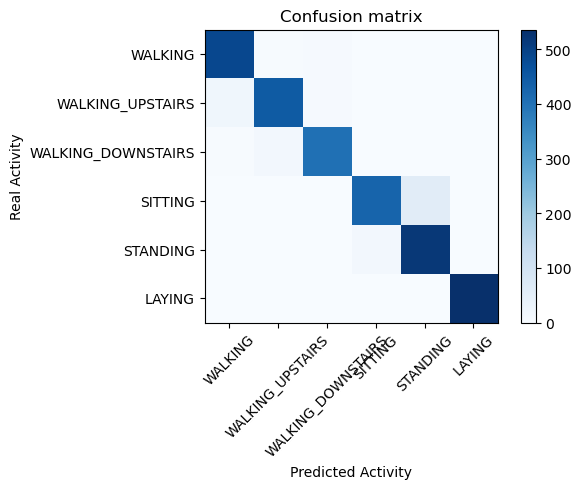

In [47]:
# Draw the confusion matrix
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=None):
    # Show the confusion matrix as an image
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    # Put labels on axis
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    
    # Pack it together
    plt.tight_layout()
    
    # Render the DataFrame as a table for easy view
    cm_df = pd.DataFrame(cm, columns=labels)
    cm_df.index = labels
    plt.ylabel('Real Activity')
    plt.xlabel('Predicted Activity')

# Labels
labels = list(map(lambda x: x[1], activity_map))

# Compute confusion matrix
cm = confusion_matrix(y_real, y_pred, labels=labels)

# Show the confusion matrix
plt.figure()
plot_confusion_matrix(cm, labels=labels)
plt.show()